# <center>  VOUDRIEZ-VOUS <u><FONT color="red">PREDIRE</FONT> LE CAC 40<u> <center>
# <center>&<center>    

In [3]:
from IPython.display import HTML, Image, YouTubeVideo, display
#Image('https://pbs.twimg.com/profile_images/831186374585880577/aQAqWwjG_400x400.jpg', width=300)
#HTML("/Users/Administrateur/Documents/ESME3/projet/Cac_40_Project_FinalVersion/PX1 - Recherche Google.html")
HTML("https://www.google.com/search?q=px1&oq=px1&aqs=chrome..69i57.1024j0j7&sourceid=chrome&ie=UTF-8")


<IPython.core.display.HTML object>

In [13]:
CAC40 = pd.read_csv('/Users/Administrateur/Documents/ESME3/projet/Cac_40_Project_FinalVersion/Data/CAC40/dfCAC_Global.csv', sep=",")
CAC40.head()


,Date,^FCHI_Open,^FCHI_High,^FCHI_Low,^FCHI_Close,^FCHI_Volume
0,2017-03-01,4897.479980,4970.640137,4897.479980,4960.830078,120246400
1,2017-03-02,4965.270020,4972.879883,4955.410156,4963.799805,106837200
2,2017-03-03,4953.299805,5002.319824,4948.720215,4995.129883,105338700
3,2017-03-06,4983.959961,4985.240234,4960.259766,4972.189941,90426900
4,2017-03-07,4974.790039,4974.790039,4941.259766,4955.000000,79830000


# PREDICTION DES 20 PROCHAIN JOURS



Bonjour chers Etudiants, entrer le symbole du téléscripteur de l'action à prédire: APL
Coefficient de détermination:  0.9686455782866716
PREDICTION DES FERMES SUR LES 20 PROCHAIN JOURS:
[26.91286979 27.64556627 27.59671984 27.34271839 27.34271839 27.32317982
 27.13756338 27.14733266 26.34625118 26.38532833 27.21571767 27.75302842
 28.42710918 27.99726058 27.25479481 27.2645641  27.20594838 27.36225696
 27.00079337 26.56117548]


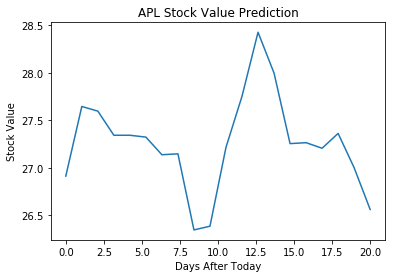

In [36]:
import quandl
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
#from sklearn import preprocessing, cross_validation, svm
from sklearn.model_selection import cross_validate

print('\n')

# Retrieve a valid input
while True:
    input_string = input("Bonjour chers Etudiants, entrer le symbole du téléscripteur de l'action à prédire: ")
    try:
        df = quandl.get("WIKI/" + input_string)                                                     # Dataframe storing stock market data
    except:
        print("BIP-BIP MAUVAIS SYMBOLE ENTRE \n")
    else:
        break

df = df[['Adj. Close']]                                                                             # Adjusted Closing Prices
# df = df[['open']]   

prediction_ahead = 20                                                                               # Predict 30 days ahead of current date
df['Prediction'] = df[['Adj. Close']].shift(-prediction_ahead)                                      # Prediction column currently storing previous known stock data

x = np.array(df.drop(['Prediction'], axis=1))                                                       # x-axis values based on Adjusted Close dataframe values
x = preprocessing.scale(x)                                                                          # x-axis values with even distribution centered on mean

x_prediction = x[-prediction_ahead:]                                                                # x_prediction is the last 30 days of x-axis values
x = x[:-prediction_ahead]                                                                           # Remove x_prediction values from x-axis values

y = np.array(df['Prediction'])                                                                      # y-axis values based on Prediction dataframe values
y = y[:-prediction_ahead]                                                                           # Remove last 30 y-axis values to match x-axis values


# x_train, x_test, y_train, y_test = cross_validate.train_test_split(x, y, test_size = 0.2)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                         test_size=0.2, random_state=42)


# Training
clf = LinearRegression()
clf.fit(x_train,y_train)

# Testing
coefficient = clf.score(x_test, y_test)
print("Coefficient de détermination: ", coefficient)

# Prediction
forecast_prediction = clf.predict(x_prediction)
print("PREDICTION DES FERMES SUR LES 20 PROCHAIN JOURS:")
print(forecast_prediction)

# Plot
plt.plot(np.linspace(0,20,20), forecast_prediction)
plt.ylabel('Stock Value')
plt.xlabel('Days After Today')
plt.title(input_string.upper() + ' Stock Value Prediction')
plt.gcf().canvas.set_window_title(input_string.upper() + ' Stock Value Prediction')
plt.show()

# DANS LA PEAU D'UN TRADER

In [38]:
actuel = CAC40 ["^FCHI_Close"].tolist()
prediction = forecast_prediction

In [39]:
accuracy(actuel,prediction)

Selon les prévisions : 
Vendre à27.645566268643307
Acheté à 27.137563378340893
Vendre à27.14733266469287
Acheté à 26.346251183831367
Vendre à28.42710917680087
Acheté à 27.25479481456453
Vendre à27.264564100916502
Acheté à 27.20594838280468
Vendre à27.36225696443619
29.902271415948267
0
Profit Net Genéré : 2.989401623702669
Profit Net actuel : 24.830078125


# PROGRAMME EN DESSOUS

In [31]:
import random
#algo trading 

money = 0
have_stock = 1
for i in range(1,len(forecast_prediction)):
    if(forecast_prediction[i]>forecast_prediction[i-1] and money>=forecast_prediction[i-1]):
        print("Acheter à " + str(forecast_prediction[i-1]))
        buy = int(money/forecast_prediction[i-1])
        money = money - buy*forecast_prediction[i-1]
        have_stock = buy + have_stock
    elif(forecast_prediction[i]<forecast_prediction[i-1] and have_stock!=0):
        print("Vendus à " + str(forecast_prediction[i-1]))
        money = money + have_stock*forecast_prediction[i-1]
        have_stock = 0

print(money)
print(have_stock)

print("Profit Net : "+ str(money+have_stock*forecast_prediction[-1] - forecast_prediction[0]))


Vendus à 44.790178967938104
Acheter à 44.188835653342096
Vendus à 45.632059608372515
Acheter à 44.93049240801051
Vendus à 45.952776042823714
Acheter à 45.1108954023893
Vendus à 45.531835722606516
Acheter à 43.186596795682085
Vendus à 44.469462533486904
48.95949261580376
0
Profit Net : 6.534597351943283


In [32]:

def algo_trade_sim(l):
    money = 0
    have_stock = 1
    buy_indices = []
    sell_indices = []
    for i in range(1,len(l)):
        if(l[i]>l[i-1] and money>=l[i-1]):
            print("Acheté à " + str(l[i-1]))
            buy = int(money/l[i-1])
            buy_indices.append((i-1,buy))
            money = money - buy*l[i-1]
            have_stock = buy + have_stock
        elif(l[i]<l[i-1] and have_stock!=0):
            print("Vendre à" + str(l[i-1]))
            sell_indices.append((i-1,have_stock))
            money = money + have_stock*l[i-1]
            have_stock = 0

    print(money)
    print(have_stock)

    print("Profit Net Genéré : "+ str(money+have_stock*l[-1] - l[0]))

    net_profit = money+have_stock*l[-1] - l[0]
    return net_profit,buy_indices,sell_indices,have_stock


def accuracy(actual,predicted):
    
    #predicted
    print("Selon les prévisions : ")
    expected_profit,buy_indices,sell_indices,stocks = algo_trade_sim(predicted)
    
    money = 0
    have_stock = 1
    for tup in buy_indices:
        money = money - actual[tup[0]]*tup[1]
    for tup in sell_indices:
        money = money + actual[tup[0]]*tup[1]
    
    print("Profit Net actuel : "+ str(money+stocks*actual[-1] - actual[0]))
    